In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))


Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.compile(optimizer = 'rmsprop',
             loss='binary_crossentropy',
             metrics = ['accuracy'])

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 209us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8686
Epoch 2/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.3004 - acc: 0.9046 - val_loss: 0.3004 - val_acc: 0.8896
Epoch 3/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3088 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.1750 - acc: 0.9438 - val_loss: 0.2840 - val_acc: 0.8831
Epoch 5/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.1150 - acc: 0.9651 - val_loss: 0.3161 - val_acc: 0.8770
Epoch 7/20
15000/15000 [==============================] - 2s 151us/step - 

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

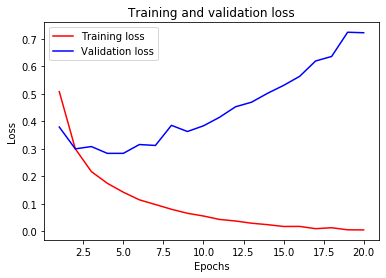

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

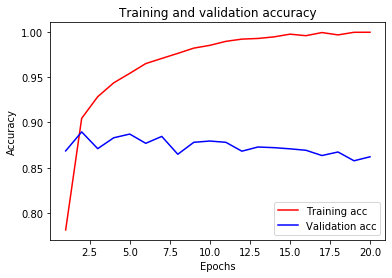

In [12]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'r', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss= 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 126us/step - loss: 0.4470 - acc: 0.8242
Epoch 2/4
25000/25000 [==============================] - 2s 93us/step - loss: 0.2557 - acc: 0.9103
Epoch 3/4
25000/25000 [==============================] - 2s 93us/step - loss: 0.1969 - acc: 0.9304
Epoch 4/4
25000/25000 [==============================] - 3s 124us/step


In [16]:
results

[0.3176934513092041, 0.8752]

In [17]:
model.predict(x_test)

array([[0.2936306 ],
       [0.99967945],
       [0.9368717 ],
       ...,
       [0.1669701 ],
       [0.15800783],
       [0.76615894]], dtype=float32)